In [14]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from glob import glob
from tqdm import tqdm

from PIL import Image, ImageDraw

%matplotlib inline

In [4]:
train_paths = glob(os.path.join('data', 'train_all', '*.jpg'))
test_paths = glob(os.path.join('data', 'test_all', '*.jpg'))

In [5]:
print(len(train_paths), len(test_paths))

95454 8000


In [7]:
train_paths[:3]

['data/train_all/9p6ef3kztn.jpg',
 'data/train_all/8hxbiggx9b.jpg',
 'data/train_all/spmpgmd0fb.jpg']

In [8]:
df_train = pd.read_csv('./data/train.csv')

print(df_train.shape)
df_train.head()

(112668, 5)


,ImageId,EncodedPixels,Height,Width,CategoryId
0,125041,180624 2 181422 6 182220 10 183018 14 183816 1...,800,800,20
1,264208,259379 3 260167 31 260955 59 261743 86 262540 ...,800,800,20
2,61992,324122 1 324921 3 325720 5 326519 7 327318 8 3...,800,800,20
3,19888,206719 7 207514 22 208309 37 209104 52 209898 ...,800,800,9
4,79151,196590 2 197386 7 198181 12 198977 16 199773 2...,800,800,20


In [9]:
import json

with open('./data/train.json') as f:
    train_json = json.load(f)

train_json.keys()

dict_keys(['images', 'annotations', 'categories'])

In [10]:
train_images = pd.DataFrame(train_json['images'])

print(train_images.shape)
train_images.head()

(95454, 4)


,file_name,height,width,id
0,hfjh3arn40.jpg,800,800,125041
1,wb9smm3iqg.jpg,800,800,264208
2,2tc29k408g.jpg,800,800,61992
3,4h0sjd5qo3.jpg,800,800,19888
4,ue3456tixh.jpg,800,800,79151


In [11]:
train_annotations = pd.DataFrame(train_json['annotations'])

print(train_annotations.shape)
train_annotations.head()

(112668, 7)


,segmentation,area,category_id,bbox,image_id,iscrowd,id
0,"[[385.0, 23.0, 392.0, 52.0, 392.0, 52.0, 404.0...",193815,20,"[224.5, 22.5, 295, 657]",125041,0,1
1,"[[462.152, 86.8861, 439.184, 65.9153, 413.22, ...",177120,20,"[323.844, 9.49304, 288, 615]",264208,0,2
2,"[[492.0, 21.0, 405.0, 122.0, 439.0, 148.0, 438...",185360,20,"[404.5, 20.5, 280, 662]",61992,0,3
3,"[[320.0, 5.9989, 258.067, 320.309, 292.03, 653...",307880,9,"[257.567, 2.50217, 430, 716]",19888,0,4
4,"[[349.0, 126.0, 379.0, 92.0, 386.0, 71.0, 393....",159643,20,"[244.5, 40.5, 253, 631]",79151,0,5


In [12]:
train_category = pd.DataFrame(train_json['categories'])

print(train_category.shape)
train_category.head()

(21, 3)


,id,name,supercategory
0,1,top,상의
1,2,blouse,상의
2,3,t-shirt,상의
3,4,Knitted fabri,상의
4,5,shirt,상의


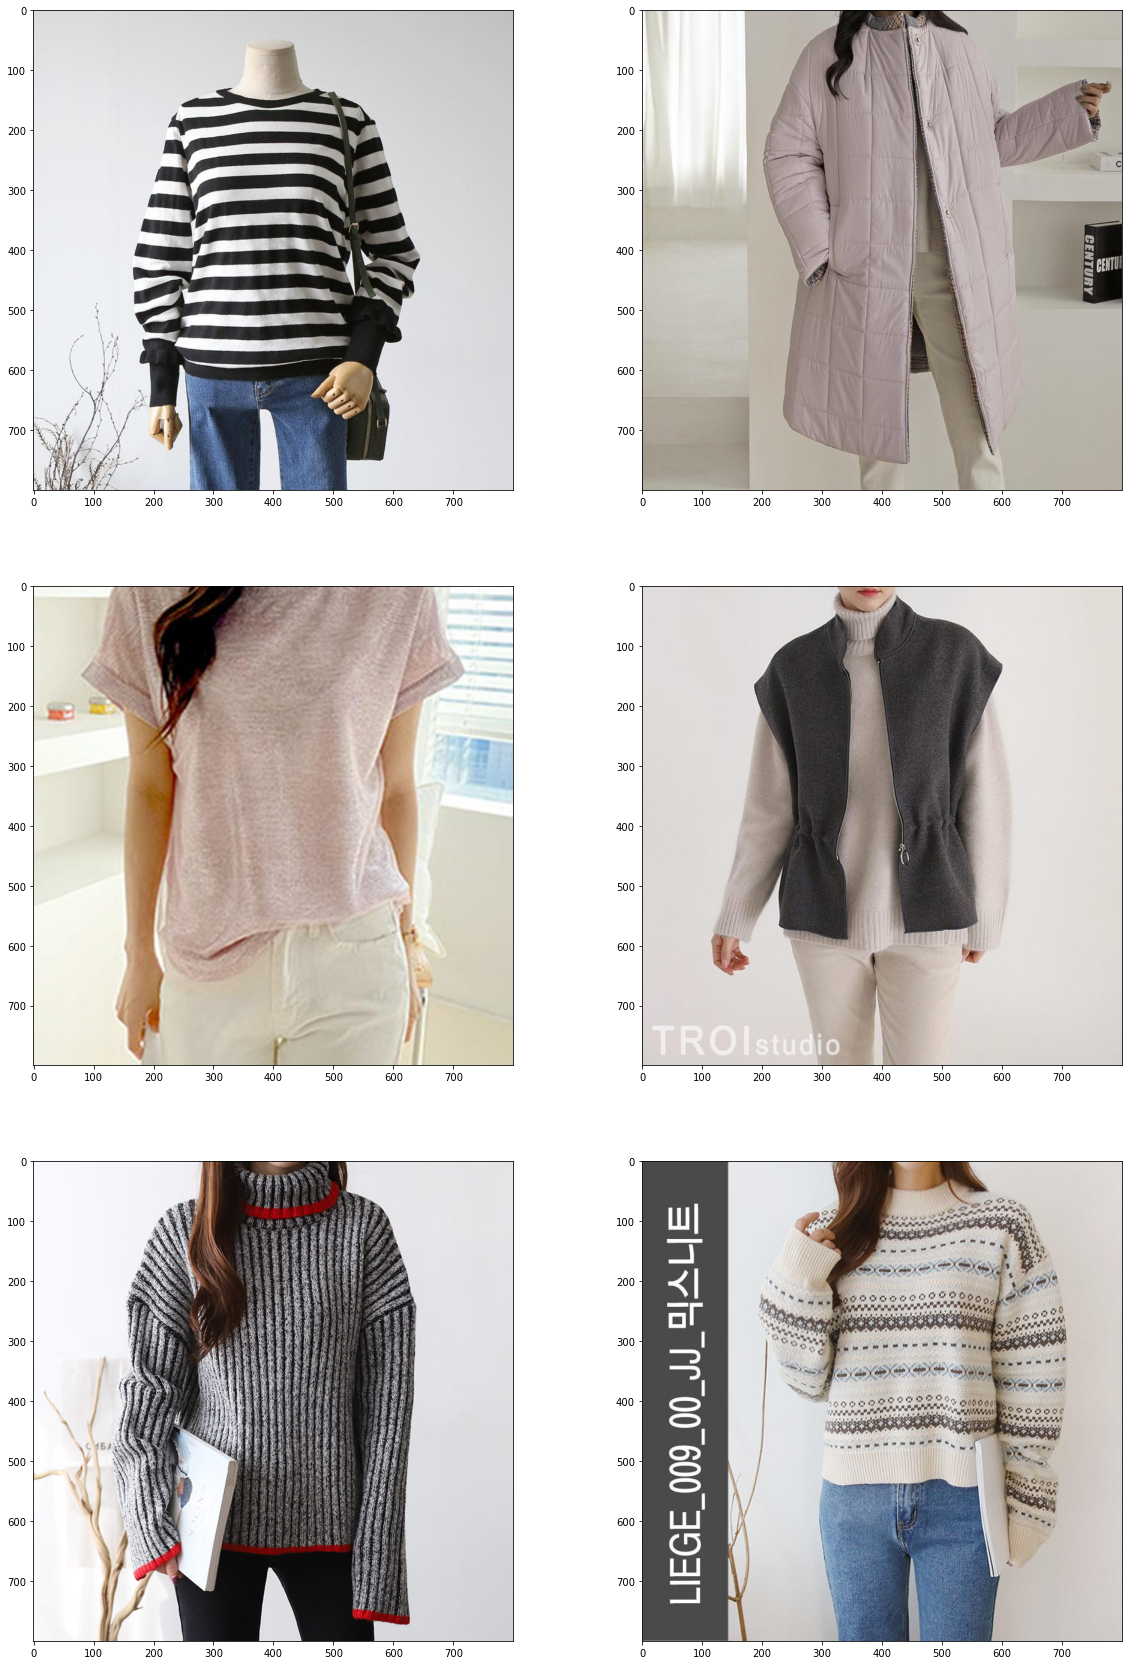

In [15]:
plt.figure(figsize=(20, 30))

for i in range(6):
    plt.subplot(3, 2, i+1)
    rnum = np.random.randint(len(train_paths))
    img = Image.open(train_paths[rnum])
    plt.imshow(img)
    
plt.show()

In [23]:
def visualize_bbox(img_path):
    img = Image.open(img_path)
    
    file_name = img_path[-14:]
    img_id = train_images[train_images['file_name']==file_name].iloc[0]['id']
    bbox = train_annotations[train_annotations['image_id']==img_id].iloc[0]['bbox']
    
    draw = ImageDraw.Draw(img)
    bbox[2] = bbox[0] + bbox[2]
    bbox[3] = bbox[1] + bbox[3]
    
    draw.rectangle(bbox, outline=(255, 0, 0), width = 5)
    
    return img

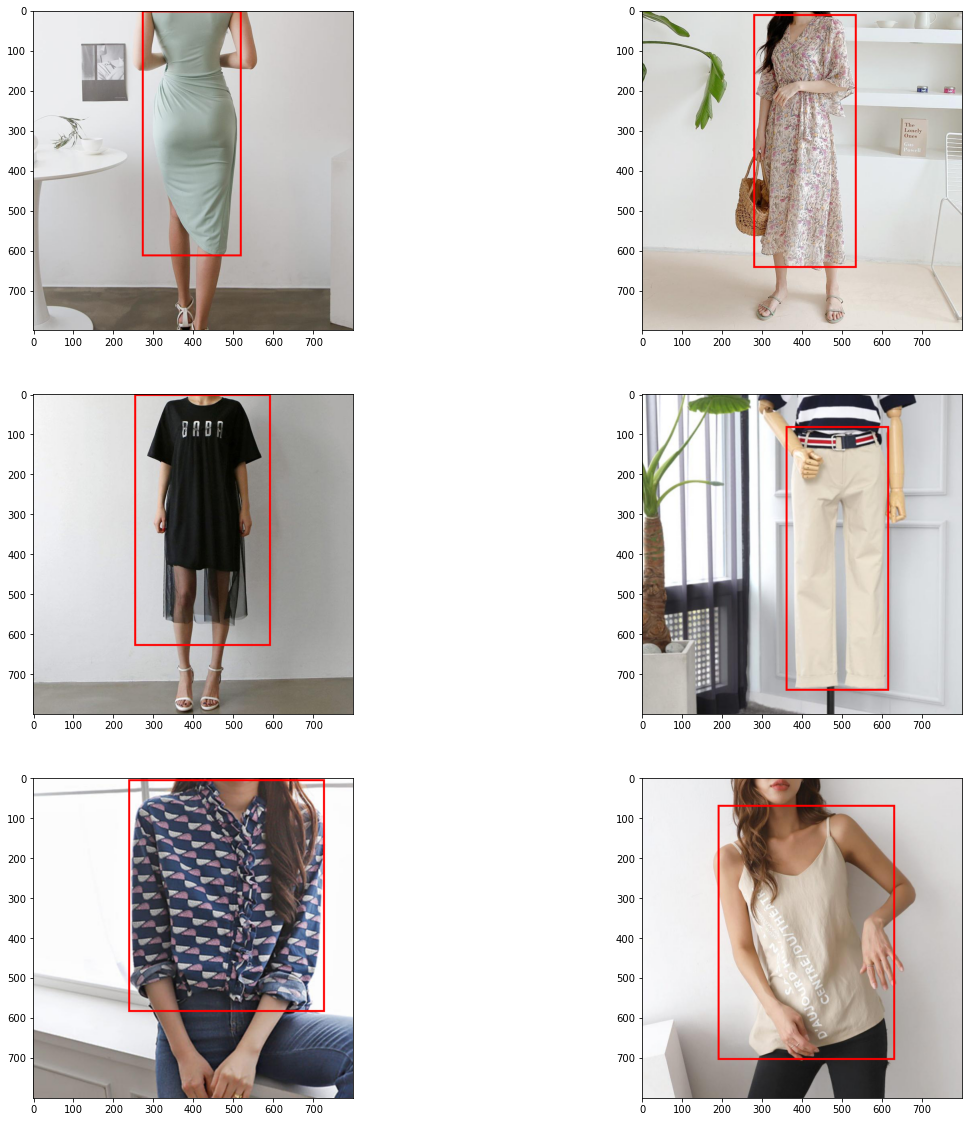

In [24]:
plt.figure(figsize=(20, 20))
for i in range(6):
    rnum = np.random.randint(len(train_paths))
    plt.subplot(3, 2, i+1)
    img = visualize_bbox(train_paths[rnum])
    plt.imshow(img)
plt.show()

In [25]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import os

In [26]:
annFile = './data/train.json'
coco = COCO(annFile)

loading annotations into memory...
Done (t=1.19s)
creating index...
index created!


In [29]:
def visualize_segmentation(img_path):
    global coco
    
    cats = coco.loadCats(coco.getCatIds())
    catIds = coco.getCatIds(catNms=['top']);
    imgIds = coco.getImgIds(catIds=catIds)
    
    # get Image ID
    file_name = img_path[-14:]
    img_id = train_images[train_images['file_name']==file_name].iloc[0]['id']
    
    #plt.figure(figsize=(15, 8))
    I = io.imread(img_path)
    """
    plt.subplot(1, 2, 1)
    I = io.imread(img_path)
    plt.imshow(I)
    
    plt.subplot(1, 2, 2)
    """
    plt.imshow(I)
    annIds = coco.getAnnIds(imgIds=img_id, iscrowd = None)
    anns = coco.loadAnns(annIds)
    coco.showAnns(anns)
    plt.show()

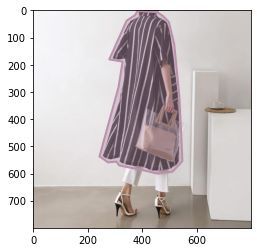

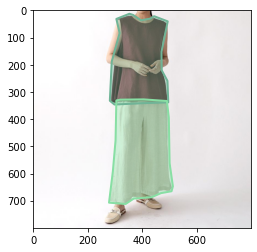

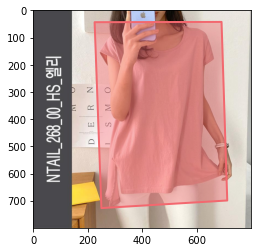

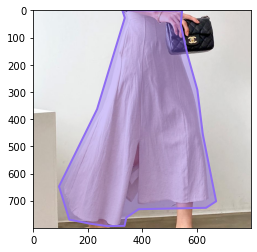

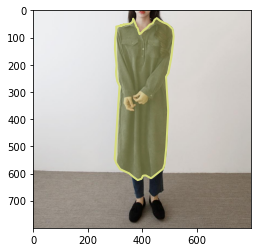

In [30]:
for i in range(5):
    rnum = np.random.randint(len(train_paths))
    visualize_segmentation(train_paths[rnum])